In [1]:
import os
from skimage import io
import pylab
import tensorflow as tf
from im2txt import configuration
from im2txt import inference_wrapper
from im2txt.inference_utils import caption_generator
from im2txt.inference_utils import vocabulary
from im2txt import inference
%matplotlib inline

In [3]:
# Directory containing model checkpoints.
CHECKPOINT_DIR="/home1/im2txt/model/train"
# Vocabulary file generated by the preprocessing script.
VOCAB_FILE="/home1/im2txt/data/mscoco/word_counts.txt"

g = tf.Graph()
with g.as_default():
    model = inference_wrapper.InferenceWrapper()
    restore_fn = model.build_graph_from_config(configuration.ModelConfig(),CHECKPOINT_DIR)
g.finalize()

# Create the vocabulary.
vocab = vocabulary.Vocabulary(VOCAB_FILE)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.1)
sess = tf.Session(graph=g,config=tf.ConfigProto(gpu_options=gpu_options))
restore_fn(sess)

INFO:tensorflow:Building model.
Instructions for updating:
Please switch to tf.summary.image. Note that tf.summary.histogram uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, the max_images argument was renamed to max_outputs.
Instructions for updating:
Please switch to tf.summary.image. Note that tf.summary.histogram uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, the max_images argument was renamed to max_outputs.
Instructions for updating:
Please switch to tf.summary.image. Note that tf.summary.histogram uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, the max_images argument was renamed to max_outputs.
INFO:tensorflow:Initializing vocabulary from file: /home1/i

In [4]:
! nvidia-smi

Sun Dec 11 15:00:27 2016       
+------------------------------------------------------+                       
| NVIDIA-SMI 352.63     Driver Version: 352.63         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX TIT...  Off  | 0000:01:00.0     Off |                  N/A |
| 29%   63C    P2    72W / 250W |   7698MiB / 12285MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX TIT...  Off  | 0000:02:00.0     Off |                  N/A |
| 22%   33C    P2    68W / 250W |   7622MiB / 12287MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [5]:
URL="http://www.breaknews.com/imgdata/breaknews_com/201602/2016021624083417.jpg"

Captions for image temp.jpg:


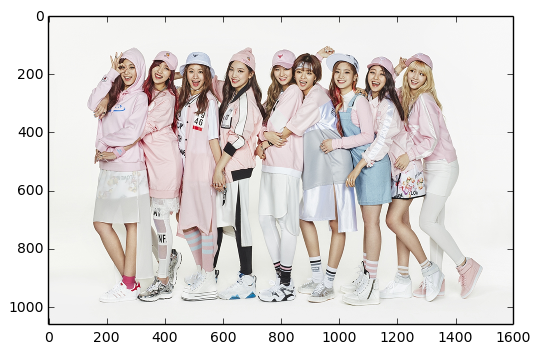

  0) a group of people standing next to each other . (p=0.002216)
  1) a group of people posing for a picture (p=0.001430)
  2) a group of people posing for a picture . (p=0.001029)


In [6]:
inference.inference_from_url(sess, restore_fn ,model, vocab, URL)

Captions for image temp.jpg:


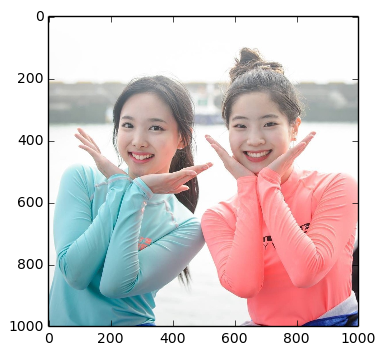

  0) a little girl sitting on top of a bed . (p=0.000152)
  1) a little girl sitting on top of a blanket on a bed . (p=0.000019)
  2) a little girl sitting on top of a blanket on top of a bed . (p=0.000017)


In [6]:
URL="http://cfile29.uf.tistory.com/image/247FCD37578C8A34129840"
inference.inference_from_url(sess, restore_fn ,model, vocab, URL)

Captions for image temp.jpg:


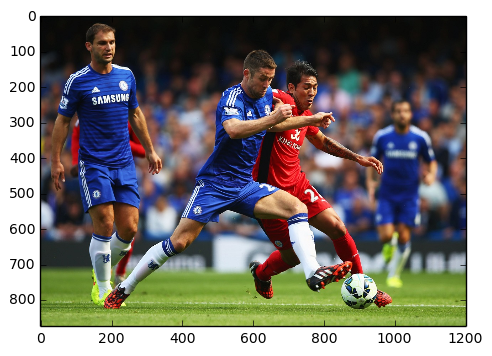

  0) a group of young men playing a game of soccer . (p=0.004254)
  1) a group of young men kicking around a soccer ball . (p=0.003782)
  2) a group of young children playing a game of soccer . (p=0.002410)


In [8]:
URL="http://images.mstarsnews.musictimes.com/data/images/full/62040/chelsea-fc-vs-leicester-city-epl-free-online-live-stream-watch.jpg"
inference.inference_from_url(sess, restore_fn ,model, vocab, URL)

Captions for image temp.jpg:


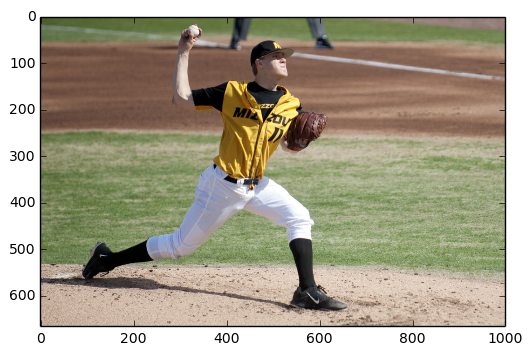

  0) a baseball player pitching a ball on top of a field . (p=0.009032)
  1) a baseball player pitching a baseball on top of a field . (p=0.004567)
  2) a baseball player pitching a ball on a field . (p=0.002769)


In [12]:
URL="https://prospects2pros.files.wordpress.com/2016/10/551ed924c2bdd-image.jpg"
inference.inference_from_url(sess, restore_fn ,model, vocab, URL)